In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("virat.csv")

In [3]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [7]:
df['RunsSanitized'] = df.Runs.map(lambda x: x.replace('*', ''))
df.RunsSanitized = df.RunsSanitized.astype("int32")

#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [8]:
df.RunsSanitized.describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: RunsSanitized, dtype: float64

In [9]:
np.percentile(df.RunsSanitized, 50) - np.percentile(df.RunsSanitized, 25)

np.float64(22.5)

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


{'whiskers': [<matplotlib.lines.Line2D at 0x11b454410>,
 'caps': [<matplotlib.lines.Line2D at 0x11b454690>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b4542d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11b454910>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b454a50>],
 'means': []}

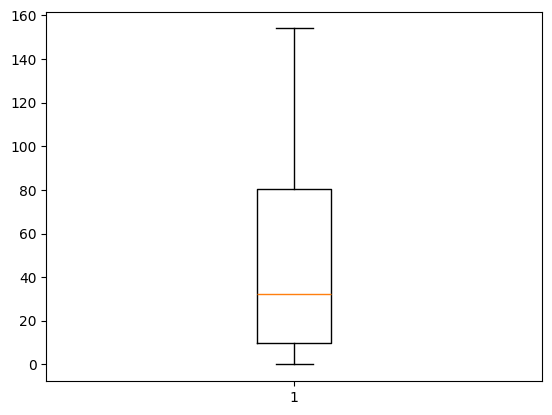

In [10]:
plt.boxplot(df.RunsSanitized)

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [15]:
df['Year'] = pd.to_datetime(df['Start Date'])
df.Year = df.Year.map(lambda x : x.year)
df.head()

/var/folders/4j/bdtxtzjn2q99blmmhhztcyth0000gn/T/ipykernel_21717/2385461398.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Start Date'])


,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,RunsSanitized,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08,12,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08,37,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08,25,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08,54,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08,31,2008


(array([ 5.,  6., 16., 31., 11., 23., 17., 10., 10.,  3.]),
 array([2008. , 2008.9, 2009.8, 2010.7, 2011.6, 2012.5, 2013.4, 2014.3,
        2015.2, 2016.1, 2017. ]),
 <BarContainer object of 10 artists>)

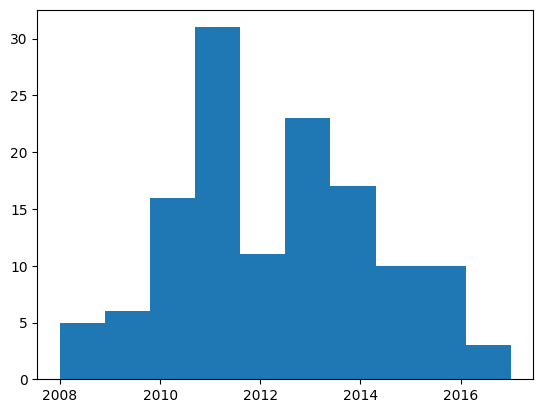

In [17]:
plt.hist(df.Year)

In [29]:
newdf = df.iloc[:, -2:]

print(newdf.head())

   RunsSanitized  Year
0             12  2008
1             37  2008
2             25  2008
3             54  2008
4             31  2008


<BarContainer object of 10 artists>

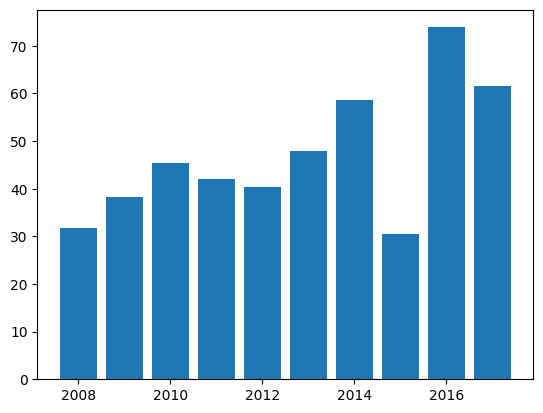

In [33]:
average_runs = newdf.groupby('Year')['RunsSanitized'].mean()

plt.bar(average_runs.index, average_runs)

#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

D - [1, 14.4)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)D - [1, 14.4)


/var/folders/4j/bdtxtzjn2q99blmmhhztcyth0000gn/T/ipykernel_21717/1521637514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mins'] = df2['Mins'].apply(lambda x: int(x))


(array([28., 13., 12.,  9.,  6.,  6.,  9.,  4.,  9., 11.,  4.,  6.,  3.,
         2.,  4.]),
 array([  1. ,  14.4,  27.8,  41.2,  54.6,  68. ,  81.4,  94.8, 108.2,
        121.6, 135. , 148.4, 161.8, 175.2, 188.6, 202. ]),
 <BarContainer object of 15 artists>)

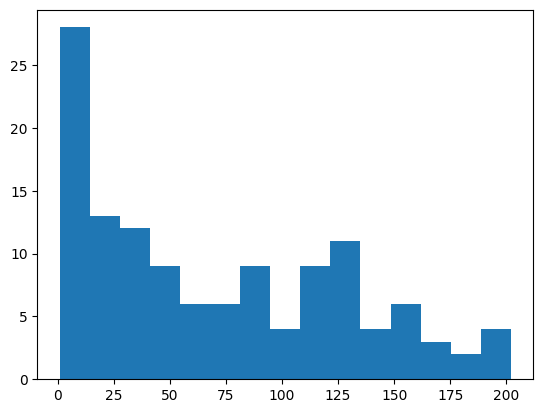

In [44]:
df2 = df[~(df['Mins']== "-")]
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))

plt.hist(df2.Mins, bins = 15)